# Class 4

Note:  The notes that follow are largely those of Mark Krumholz (ANU) who led the Bootcamp
last in 2015.  You can find the 2015 lectures [here](https://sites.google.com/a/ucsc.edu/krumholz/teaching-and-courses/python-15)

In [1]:
# These are to display images in-line
from IPython.display import Image
from IPython.core.display import HTML

#Imports
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Files: The Basics

## Writing text files

Thus far we have mostly dealt with inputs and outputs by keyboard and screen, with the exception of using files to define functions and to write out plots. However, for the vast majority of scientific (and other) applications we want to be able to handle files. Handling files allows us to read in and process data in an automated fashion, and to write out results in a form that is easy to save, and is suitable for something too complex to just print to the screen. Thus half of today's class is devoted to file handling.

Files are opened with the open() command, which works as follows:

In [2]:
f = open('testfile.txt', 'w')

The first argument is just the name of the file to be opened. The second argument gives the mode in which it is to be opened. We'll learn about more modes as we go, but a quick summary is that files can be opened for writing, reading, appending, or both reading and writing. A file that is opened for writing is created as an empty file; if a file of the same name already exists, it is automatically deleted. Append mode is the same, except that material is added to the end of the existing file instead of replacing it. Files that are opened for writing or appending can only be written, not read as inputs. Conversely, files that are opened for reading can be read in, but cannot be altered. Files that are opened for both reading and writing can be interacted with in both ways.

Once a file has been opened, we can write text into it by invoking the write function that is associated with that file:


In [3]:
f.write('Output written to a file\n')
a = 2
b = 3.0
f.write(str(a)+' '+str(b)+'\n')

6

There are two subtle things to notice here. First, we've ended the lines we're writing out with '\n'. The \n is the code for a line break. If we don't include that, the output will all be on a single line. By default the write command does not add a line break after writing something, so if you want line breaks, you need to put them in yourself. Second, the write command takes a string as an argument, and only a string: in this example, f.write(a) would produce an error, because a is an integer not a string. To write it out, we must turn a into a string first by doing str(a).

Once we're done with the file, we can close it by invoking the close() method:

In [4]:
f.close()

Now let's look at the file from the command line using the more command:

In [5]:
# more is a bash (terminal) command, using the sign ! allows you to write bash comands in the notebook ( try !ls) 
!more testfile.txt

Output written to a file
2 3.0


We've successfully written to a file.

## String formatting

When writing numerical output to a file, it is often helpful to have a bit more control about how numbers are converted into text. This capability is provided by the format command. Here's a very simple example of how string formatting works:

In [6]:
s = "Here is an integer: {}; here is a float: {}".format(a, b)
print(s)

Here is an integer: 2; here is a float: 3.0


The basic usage of the format command is as follows: we put a string in quotes, which contains one or more pairs of curly brackets {}. At the end of the string, we put .format(arg1, arg2, arg3,...) where arg1, arg2, arg3, ... are some number of arguments that are to be formatted. These arguments will be matched up with the curly brackets, which are used to specify where the data are to be placed in the output. Each of these arguments will be converted to a string and inserted in the appropriate location. In this example, the variable a was converted to the string "2" and the variable b was converted to the string "3.0". The resulting string is returned, and may be assigned to a variable, printed on the screen, or given to the write command, as we like.

The power of the format command comes in the fact that we can put codes inside the brackets to control how the numerical values are converted to strings. For example:


In [7]:
print("Here is an integer: {:5}; here is a float: {:5.3f}".format(a, b))

Here is an integer:     2; here is a float: 3.000


Let's break down what appeared inside the brackets. First, there is a colon, which says that we are now going to specify a format. Then in both cases we put the number 5. This specifies that the number is to be converted into a space at least 5 characters wide, padding it with spaces if necessary. Then for the second argument, we had ".3f". The period followed by a number and f says that we want a floating point number to be printed out using a certain minimum number of decimal places, padding with zeros if necessary.

Some other options:

In [8]:
print("Here is an integer: {:05}; here is a float: {:^10.2e}".format(a, b))

Here is an integer: 00002; here is a float:  3.00e+00 


In the first location, we put 05 instead of 5. The leading 0 says that the extra spaces are to be filled with zeros instead of spaces. In the second argument, the ^10 says that the string is to be 10 spaces wide, and that the results are to be centered within it, as opposed to right-justified (which is the default). The ".2e" says that we want two decimal places, and that we want the output to be printed out in exponential (scientific) notation instead of floating point notation.

Numerous other options for string formatting exist: see http://docs.python.org/2.7/library/string.html#formatspec.

Let's use this capability to print out some data describing a sin function:


In [9]:
x = np.arange(0,2*np.pi,0.01)
f = open('sin.txt', 'w')
for val in x:
    f.write("{:.4f} {:7.4f}\n".format(val, np.sin(val)))
f.close()

Now we can look at the file from the command line, since we have created a large file, we will only print the first 20 lines using the bash command head:

In [10]:
!head -20 sin.txt

0.0000  0.0000
0.0100  0.0100
0.0200  0.0200
0.0300  0.0300
0.0400  0.0400
0.0500  0.0500
0.0600  0.0600
0.0700  0.0699
0.0800  0.0799
0.0900  0.0899
0.1000  0.0998
0.1100  0.1098
0.1200  0.1197
0.1300  0.1296
0.1400  0.1395
0.1500  0.1494
0.1600  0.1593
0.1700  0.1692
0.1800  0.1790
0.1900  0.1889


We've printed out the sin function to four digits of precision in both the x and y values. For the y values, we specified that the column was to be 7 spaces wide, so that the decimal points would line up.

## Reading text files

Next we come to the inverse operation: reading in a text file. Let's open up the file we just wrote in read mode:

In [11]:
 f = open('sin.txt', 'r')

We can read a single line from the file in as a string with the readline() command:

In [12]:
f.readline()

'0.0000  0.0000\n'

In [13]:
f.readline()

'0.0100  0.0100\n'

In [14]:
f.readline()

'0.0200  0.0200\n'

Note that each call to readline() automatically moves the pointer in the file forward, so that the next invocation of readline() reads in the next line. If one reaches the end of the file, then calling readline() just produces an empty string.

(Note to those familiar with languages like C++: there is no EOF-checking function in python, and reading beyond the end of a file does not produce an error. Python's general philosophy about things like this is "It is better to ask forgiveness than permission", meaning that we don't handle things like the ends of files by testing for them, we handle them by trying the operation we want to perform, and seeing if it succeeds.)

If you want to go back to the beginning, you can use the seek() function:

In [15]:
f.seek(0)

0

The argument is the offset from the start of the file, measured in bytes. Thus a value of 0 points back to the start of the file.

One can also read the file contents in a couple of other ways. The function readlines(), as opposed to readline(), reads all the lines of the file into a list, with each item in the list corresponding to a separate line. For example:

In [16]:
contents = f.readlines()
contents[0]

'0.0000  0.0000\n'

In [17]:
contents[1]

'0.0100  0.0100\n'

In [18]:
contents[2]

'0.0200  0.0200\n'

In [19]:
len(contents)

629

One can also iterate over a file using a for loop, which reads in the lines one by one. Here's an example of using this approach to read our sin function back into a pair of x and y arrays that we can then plot: 

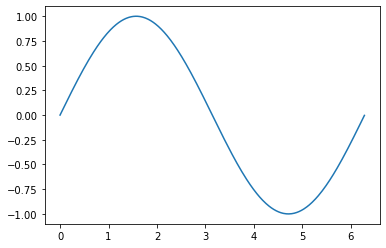

In [20]:
f.seek(0)        # Back to the beginning
xinput = []      # Create an empty list to receive the x values
yinput = []      # Ditto for the y values
for line in f:   # Read the file
    spl = line.split()              # Break up the line into two parts
    xinput.append(float(spl[0]))    # Add first part to xinput list
    yinput.append(float(spl[1]))    # Add second part to yinput list

f.close()                   # We're done with this file
xinput = np.array(xinput)   # Convert x list to array
yinput = np.array(yinput)   # Same for y list
plt.plot( xinput, yinput )  # Plot

Let's break down this block of code to understand what it does. The first line just returns us to the start of the file. The next two lines create empty lists into which we will place the x and y values we're reading. The last three lines convert the x and y lists into arrays and plot them.

The fourth line is the meat of the operation. The construct "for line in f:" iterates over the file just like we can iterate over a list, with each line of file acting like an element of the list. (We would have gotten exactly the same result by doing "for line in contents:", but the construct "for line in f:" is generally preferable, because it will work even for files that are too large to hold the entire thing in memory at once.) Inside the loop, we use the string function split() to break the string up into two pieces separated by whitespace, and then we append those two pieces to the x and y lists, respectively. When we're done, we have all the lines of the file read into those lists.


Reading text files is a common enough operation that, not surprisingly, people have written code to perform operations of this sort before. One particularly flexible bit of code for reading in tables of data stored in text form is the ASCII table reader that is included in the [astropy](http://www.astropy.org/) package of python routines for astronomy. To read the data using astropy, we can do the following:

In [21]:
from astropy.io import ascii

data = ascii.read('sin.txt')
type(data)

astropy.table.table.Table

The first line imports that ascii package from astropy.io (the input/output part of astropy). The second reads the data table. Astropy is smart enough to guess many common formats, and has no trouble with the simple one we've constructed. The resulting object is stored in a variable called data, and we can see that it is of type table.

In a table like ours without any headers, the columns of the table are by default named col1, col2, etc. We can access these from the data object using an interface like dict, where we give the name of the column. The data can then be plotted. For example, we can do

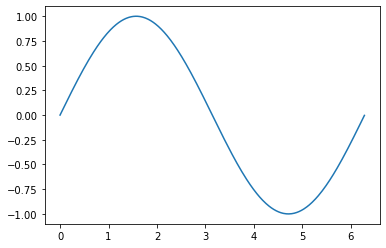

In [22]:
plt.clf()
plt.plot( data['col1'], data['col2'] )

## Binary files: writing

The files we've dealt with so far are text files, consisting of sets of characters. While text files have the virtue of being mostly human-readable, text format is very inefficient in terms of the number of bytes required to store data. For example, let's think about a standard python floating point value. On most modern architectures a float is 64 bits long. While a float is 64 bits (= 8 bytes) of information, how much space does it take to store that information as text?

For the way floats are stored, 64 bits translates to 15 digits decimal places of precision and 3 digits in the base-10 exponent. For example, on my laptop, the largest representable float (obtained by typing sys.float_info at the python prompt, for those interested) is 1.7976931348623157e+308. (For the astute, notice that this is 16 decimal places; the last one is not precise because we cannot accurately place arbitrary values in it.) Thus in text format, to represent an arbitrary a floating point number in exponential notation we need something of the form X.XXXXXXXXXXXXXXXe+XXX. This is 22 characters, and each ASCII text character requires 1 byte to represent it, so representing this 8 byte number in ASCII requires 22 bytes of storage -- and that's not counting the extra spaces, carriage returns, or other formatting stuff we might need to render a list of such numbers legible.

Thus storing floats as ASCII requires a minimum of 2.75 times as much space as the actual data itself. Clearly this is a waste of disk space, and will also unnecessarily slow down file reading, transfer, etc. For this reason, data sets of any substantial size are always stored as binary rather than text data.

Python allows one to handle binary as well as text data. To deal with binary data, when opening a file one must specify that it is to be opened in binary mode. The main difference between binary and text mode is that, in text mode, one can write data other than strings, and it will not be converted to any sort of string representation before it is written. (There are other, subtle, platform-dependent differences as well, which we will not get into.) To open a file in binary mode, just append a "b" after the "r", "w", or "a" specifying the read/write/append mode.

As an example, we can write out our sin function data to a binary file as follows:


In [23]:
f = open('sin.dat', 'wb')
f.write(x)
f.write(np.sin(x))
f.close()

These commands will create a binary file called sin.dat, which contains the values stored in the array x, followed by the values for sin(x). We can't look at this data directly using the more command, because it's not stored in a format that is human-readable, but we can verify that the right amount of data is there by doing the following at the command line (note that this assumes mac or unix):

In [24]:
!ls -l sin.dat

-rw-r--r-- 1 bruno bruno 10064 Jan 12 17:06 sin.dat


The number 10064 is the number of bytes in the file, and you can very quickly verify that this is 629 * 2 * 8 -- here 629 is the number of elements in x, 2 is for two arrays (x and sin(x)), and 8 is the number of bytes for each float. So the file is the right size at least. If you compare this to the size of the text file sin.txt, you will notice that sin.txt is actually almost exactly the same size (about 5% smaller), but this is just because we only wrote out the text data to 4 decimal places, and thereby threw away a huge amount of information. The binary data file contains 15 digits of precision, not 4, in the same amount of disk space.

## Binary files: reading

The downside to the compactness of binary format is that reading the data back in is considerably more complex. The problem is that a binary file is nothing but a string of bytes. There's no formatting information specifying whether they are floats, integers, or something else. Thus you have to know how to interpret them in order to turn them into something useful. In python, this procedure is done in two steps.

The first step is to read in the raw data using the read() command. Let's read in the array of x values for our example file:


In [25]:
f = open('sin.dat', 'rb')
xraw = f.read(629*8)
type(xraw)

bytes

Note that the read command takes as an argument the number of bytes to read in; if one omits this argument, the entire file is read. In this example, we know that the file contains two arrays of 629 numbers each, corresponding to the array of x values, and then the array of sin(x) values. Thus 629*8 is the number of bytes used to store the x array, and the command f.read(629*8) reads in this data.

The data are placed into the variable xraw. This variable is a string, but really it's just a representation of the stream of bits that represents our array. To turn it into a set of floating point numbers that we can actually use, we need to tell python explicitly how to interpret this stream of bits. Python provides a module called struct for performing this sort of operation. Here's how we can use it:


In [26]:
import struct

xin = np.array(struct.unpack('d'*629, xraw))

After importing the struct module, we call the function it provides called unpack(). The unpack() function converts streams of raw bits like we just read into numbers. The second argument to unpack() is the stream of bits to be converted, while the first argument is a string specifying how they are to be interpreted. In this example, the letter d means that they are to be interpreted as double precision numbers (meaning 64-bit floats; this is called double precision for [historical reasons](http://en.wikipedia.org/wiki/Double-precision_floating-point_format) having to do with computer architecture), while the *629 makes a string of 629 d's, since there are 629 such numbers. Finally, the array() command says to take these 629 numbers, which come out as a tuple, and convert them to a numpy array suitable for plotting.

To finish up, we can do the same for the sin(x) array, and then plot:


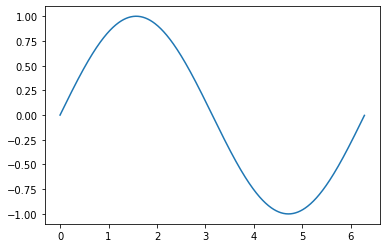

In [27]:
yraw = f.read(629*8)
f.close()
yin = np.array(struct.unpack('d'*629, yraw))
plt.clf()
plt.plot( xin, yin )

The result is the same as when we stored the data in text format (or at least indistinguishable by eye -- the text data is much less precise because we only stored 4 decimal places, but the differences too small an amount to see):

# Specialized File Formats

The choice between binary and text files is somewhat unappetizing. Text files are easy to read by humans, but are impractically-large and inefficient for substantial amounts of data. Binary files are compact, but you have to know exactly what they contain to get anything useful out of them. Is there an alternative? Yes!

This is what specialized file formats are for. They are file formats that consist (usually) of all or mostly binary data, but in an agreed-upon format that is self-documenting, meaning that, if you know the format, the file itself contains enough information to interpret it the rest of it. A simple example of self-documentation would be if we started our example binary file by writing out the number of elements in the x array, and then writing the data, so that we wouldn't have to know in advance how long the arrays of x and sin(x) values are. This would only add a very small amount to the file size, but would make the data much more useful.

The number of file formats in the world is immense, but there are a few that are particularly useful for astronomical and/or python applications, which we'll discuss briefly.

## Numpy array files

The numpy library provides a standard tool for saving the contents of numpy arrays, and reading them back in: the save() and load() functions. Usage is very simple. To save an array, just do

In [28]:
np.save( 'x.npy', x )
np.save( 'sinx.npy', np.sin(x) )

The first argument is the file name to save to. If you don't type in the extension .npy manually, one will be added for you. The second argument is the array to save.

Then to read the arrays back in, just do

In [29]:
xin = np.load( 'x.npy' )
sinxin = np. load( 'sinx.npy' )

That's it.

## Pickling and pickle files

The numpy array format is fine for saving numpy arrays, but suppose that we want to save something else. Is there a way to do that? Yes!

Python provides a technique called pickling. The [pickle](http://docs.python.org/2/library/pickle.html) module provides tools to take an arbitrary variable or object in python, turn it into a stream of bytes that are then saved to a file, and reconstruct the object from a file. The procedure of taking an object and turning it into a file that can be saved is called pickling, and the procedure of unpacking the file to get back a python object that can be manipulated in a python program or session is called unpickling. Any built-in python variable can be pickled and unpickled, as can most user-defined objects, leaving out some subtle complications.

Here's an example. Suppose we make a dict that contains an array of x values and then its sin, cosine, and tangent:

In [30]:
trigfuncs = {'x': x, 'sin': np.sin(x), 'cos': np.cos(x), 'tan': np.tan(x)}

We can save this object using pickle as follows:


In [31]:
import pickle

f = open('trigfuncs.pkl', 'wb')
pickle.dump(trigfuncs, f)
f.close()

The first command here imports the pickle module. The second opens a file for writing in binary format; the standard extension for pickle files is .pkl. The third line invokes the pickle.dump() method, which writes the data to the file. The first argument is the data to be written, and the second is the file where it is to go. The final line closes the file.

To reconstruct the object, we just open the file again, and read it in using the pickle.load() command:

In [32]:
f = open('trigfuncs.pkl', 'rb')
data=pickle.load(f)
f.close()

The first command opens the file, the second loads its contents into an object called data, and the third closes the file. We can readily verify that the object we've created, called data, is a dict that contains the same information as the original object trigfuncs:

In [33]:
type(data)

dict

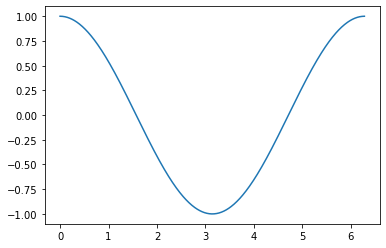

In [34]:
plt.plot( data['x'], data['cos'] )

## FITS image files

A second very common format in astronomical applications is FITS, which stands for Flexible Image Transport System. FITS is a file format that was originally designed to store astronomical images. It differs from most standard image formats in that it was set up to store, in addition to the image itself, a lot of metadata describing things like what instrument the image came from, how that instrument was configured, where in the sky it was pointed, etc. FITS is supported these days by the Goddard Space Flight Center (GSFC); more information about FITS can be found at http://fits.gsfc.nasa.gov/.

To experiment with FITS data, we need some to play with. You can download an example file [here](https://sites.google.com/a/ucsc.edu/krumholz/teaching-and-courses/python14/class-4/w0ck0101t_c0h.fit?attredirects=0&d=1). This particular file is an example from the GSFC website, at http://fits.gsfc.nasa.gov/fits_nraodata.html.

Once we've got the file downloaded and moved into the directory where we're running python, we're ready to look at it. The first step is to load the required libraries, which are part of the [astropy](http://www.astropy.org/) package of python routines for astronomy:

In [35]:
from astropy.io import fits

Then we open the data file.

In [36]:
hdulist = fits.open('w0ck0101t_c0h.fit')

The open command returns a list of HDUs, short for header data units. An HDU is a block of data. The most common format for FITS files, which this example follows, is that there are two HDUs, one containing an image, and one containing metadata describing that image. To see a summary of what the HDUs contain, we can do

In [37]:
hdulist.info()

Filename: w0ck0101t_c0h.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     196   (800, 800, 4)   int16 (rescales to float32)   
  1  w0ck0101t_cvt.c0h.tab    1 TableHDU       194   4R x 37C   [D25.16, D25.16, D25.16, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, I11, E15.7, I11, I11, A24, A24, A8, A8, A8, I11, E15.7, E15.7, E15.7, E15.7, I11, I11, I11, I11, I11, I11, I11, A24, E15.7, E15.7, E15.7, E15.7]   


This output tells us that there are two HDUs. The first one, called PRIMARY, consists of an array of 800 x 800 x 4 floating point numbers. The type of HDU is PrimaryHDU, which is a type that corresponds to an astronomical image, or, in this case, four images. (There are four because this particular data is from an instrument on the Hubble Space Telescope that had four CCD chips, and the data are recorded separately for each one.) The second HDU, called w0ck0101t_cvt.c0h.tab, is of type TableHDU. It is a table consisting of 194 entries. That's the metadata.

We can get a look at the metadata by printing out the header information associated with the table:

In [38]:
hdulist[1].header

XTENSION= 'TABLE   '           / FITS STANDARD                                  
BITPIX  =                    8 /  8-bits per 'pixels'                           
NAXIS   =                    2 /  Simple 2-D matrix                             
NAXIS1  =                  584 /  No of characters per row                      
NAXIS2  =                    4 /  The number of rows                            
PCOUNT  =                    0 /  No 'random' parameters                        
GCOUNT  =                    1 /  Only one group                                
TFIELDS =                   37 /  Number of fields per row                      
EXTNAME = 'w0ck0101t_cvt.c0h.tab' / Name of table                               
TTYPE1  = 'CRVAL1  '           /                                                
TBCOL1  =                    1 /                                                
TFORM1  = 'D25.16  '           / %25.16g                                        
TUNIT1  = '        '        

The output here tells us about the entries in the table. We can access them using the attribute data, and asking about particular data values. For example, two of the entries are CRVAL1 and CRVAL2, which give the right ascension and declinations (celestial coordinates) of a reference pixel. We can print those out as follows:

In [39]:
hdulist[1].data['CRVAL1']

array([291.02797853, 291.02797853, 291.02797853, 291.02797853])

In [40]:
hdulist[1].data['CRVAL2']

array([-22.01122139, -22.01122139, -22.01122139, -22.01122139])

There are four entries because there are four images, though the reference pixel positions are the same for all of them in this example. This data says that the right ascension of the reference pixel is 291.02797853 degrees, and the declination is -22.01122139 degrees.

The image itself is stored in the first HDU, and we can use the imshow command to display it. Let's do that, using a logarithmic color scale:

/home/bruno/pyEnvs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


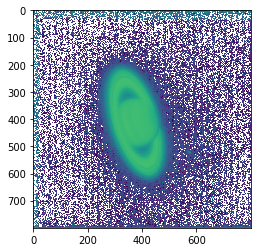

In [41]:
plt.clf()
plt.imshow( np.log(hdulist[0].data[0,:,:]) )

Note that the [0,:,:] is to specify that we want to see the first of the four images. Also notice the warning; that occurred because some of the pixel values are negative due to instrument noise, and taking the log of a negative number if of course undefined. However, we don't have to worry about that.

This particular example is an image of Saturn, one of the first ever made by HST.

When we're done with the FITS file, we close it via

In [42]:
hdulist.close()

# Basic Statistics
 

## Descriptive statistics

We now move to the second topic of today's class. Now that we know how to get data in and out of a python session, what can we do with it? We can do many things of course, but one of the most basic is to perform some statistical analysis of it.

Let's start by making ourselves some data to play with. Since we want this to be like real data, we'll be sure to add some noise to it.

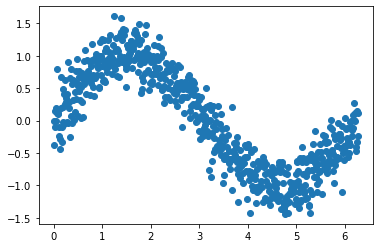

In [43]:
noise = np.random.normal( scale=0.25, size=len(x) )
y = np.sin(x) + noise
plt.clf()
plt.plot( x, y, 'o' )

To make the noise, we used the numpy function random.normal(). This picks random numbers from a normal (Gaussian) distribution with a dispersion sigma given by the keyword scale. The keyword size specifies how many random values to pick, and in this case we set it to as many elements as there were in x. Then we made a y value by setting it equal to sin(x) plus the noise. 

Note that there are other numpy random routines that will generate random numbers with different distributions.

Once we have this data, there are numerous numpy routines that we can use to analyze it. The functions below all come from the [numpy statistics package](http://docs.scipy.org/doc/numpy/reference/routines.statistics.html).

We've already encountered the amin and amax routines, which find the minimum and maximum value. We can also find the mean, median, and standard deviation just as easily:

In [44]:
np.mean(y)

2.2357252709125184e-05

In [45]:
np.median(y)

-0.013349835524341103

In [46]:
np.std(y)

0.7653375596903697

We can also find percentiles, i.e., the value below which p percent of the sample lies. For example,

In [47]:
np.percentile( y, [25,50,70] )

array([-0.64566341, -0.01334984,  0.57541746])

This gives the value below which 25%, 50%, and 75% of the values in y lie. Note that the 50th percentile is the same as the median.

Finally, we can put the data in bins and count occurrences. The command to do this is called [histogram()](http://docs.scipy.org/doc/numpy/reference/generated/numpy.histogram.html), and it works as follows:


In [48]:
hist, edges = np.histogram( y, range=(-1.5, 1.5), bins=30 )

In [49]:
edges

array([-1.5, -1.4, -1.3, -1.2, -1.1, -1. , -0.9, -0.8, -0.7, -0.6, -0.5,
       -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,
        0.7,  0.8,  0.9,  1. ,  1.1,  1.2,  1.3,  1.4,  1.5])

In [50]:
hist

array([ 4,  8, 16, 20, 22, 18, 22, 30, 36, 31, 29, 23, 22, 19, 20, 20, 15,
       20, 18, 22, 32, 30, 30, 26, 40, 16, 14, 11, 10,  3])

The histogram command takes as input the data to be histogrammed, and then keywords specifying the range for the bins (in this case -1.5 to 1.5) and the number of bins (in this case 30, so that each bin will be 0.1 wide). One can also specify the edges of the bins manually. The output is a tuple of two items. The first is the histogram itself, which we've called hist, and the second is the values of the bin edges, which we've called edges. Upon return, hist contains the number of array elements in each bin.

We can plot this data as a bar plot, using the bar command in matplotlib.


<BarContainer object of 30 artists>

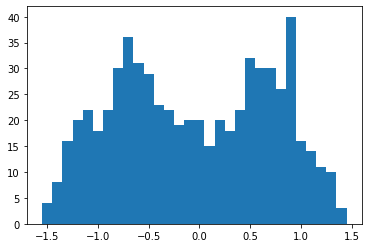

In [51]:
plt.clf()
plt.bar( edges[:-1], hist, width=0.1 )

## Curve fitting

What we've been doing thus far is descriptive statistics: taking a set of data and calculating various quantities that describe it. The final topic for today is model fitting: using a data set to derive a model for how the underlying phenomenon behaves. The simplest application of this is to fit curves through data. Before discussing how to do this in python, we must review the basic theory of curve fitting first.

Curve fitting is a problem of finding the minimum of a function. Suppose that we have a set of measured data points (x1, y1), (x2, y2), (x3, y3), .... The data are not perfect. They consist of a measurement plus some amount of noise. We have some model of the data, which we can describe by a function y(x; p), where p is a set of one or more parameters describing the model. For example, we might wish to measure the strength of the surface gravitational field on a planet. We know that a point mass dropped in a constant gravitational field in vacuum will fall a distance

\begin{equation}
d = \frac{1}{2} g t^2
\end{equation}

in a time $t$. To measure $g$, we can drop and object and record the distance $d$ it has travelled at a variety of times $t$. Given these measurements, we want to find the value of $g$ that we should infer from the data; here $g$ is the parameter to be fit given the ($t$, $d$) data.

Under fairly general assumptions about the nature of the error in the measurements, one can show that the the "best" fit is given by the value of $g$ that minimizes the squared distance between the model and the data. That is, we can define a function for the error by

\begin{equation}
e^2(g) = \sum \left[ \frac{1}{2} g t_i^2 - d_i \right]^2
\end{equation}

where the sum runs over all the measurements $i$. The best value of $g$ is the one for which $e^2(g)$ reaches its minimum value.

More generally, for a set of measurements (x1, y1), (x2, y2), (x3, y3), .... and a model y(x; **p**), we wish to find the set of values **p** that minimizes the multi-dimensional function

\begin{equation}
e^2(\mathbf{p}) = \sum \left[ y_i - y(x_i; \mathbf{p}) \right]^2.
\end{equation}


If the data points do not all have the same error, so that some are more reliable than others, this can be generalize to minimizing

\begin{equation}
e^2(\mathbf{p}) = \sum \frac{ \left[ y_i - y(x_i; \mathbf{p}) \right]^2 }{ \sigma_i^2},
\end{equation}

where $\sigma_i$ is the error on data point $i$.

In the case where $\mathbf{p}$ is only a single parameter, this problem is fairly straightforward, although for sufficiently complex models it can still be tricky as the function may have more than one minimum, and our goal is to find the global minimum. In multiple dimensions the problem is considerably trickier, and the problem that there might be multiple local minima that we must sort through to find the global minimum is significantly worse.

The operation of attempting to find the best-fitting parameter is sufficiently common that numpy and scipy provide routines to do it. The simplest of these fits to a particular function $y(x; \mathbf{p})$: a polynomial. That is, a function of the form

\begin{equation}
y(x; \mathbf{p}) = p_0 + p_1 x + p_2 x^2 + p_3 x^3 + ... + p_N x^N.
\end{equation}

Here the value $N$ is the degree of the polynomial. The numpy routine that performs this operation is called [polyfit](http://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html). Here is an example of how it can be used:

In [52]:
fit = np.polyfit( x, y, 1 )
fit

array([-0.31065589,  0.97548184])

The first argument is the array of x values, the second is the array of y values, and the third is the degree of the polynomial to be fit. In this case we have fit a first-order polynomial, i.e., a straight line. The output is the array of polynomial coefficients, starting with the highest-order one and proceeding to the lowest. Thus polyfit has returned a best-fitting function

In [53]:
function = 'y = {} + {} x '.format( fit[1], fit[0] )
print( function )

y = 0.9754818447791317 + -0.3106558877472683 x 


To see how this compares to the data, we can do

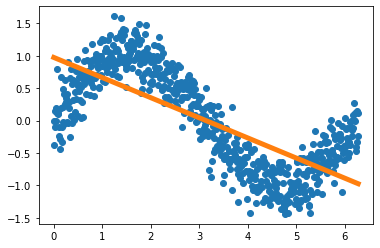

In [54]:
plt.clf()
plt.plot( x, y, 'o' )
plt.plot( x, fit[0]*x + fit[1], lw=5 )

Clearly this is not a very good fit, which illustrates an important point: just because you can find a best fit, doesn't mean it's a good one

We can try a somewhat more complex function, say a 12th order polynomial, and see if that does better:

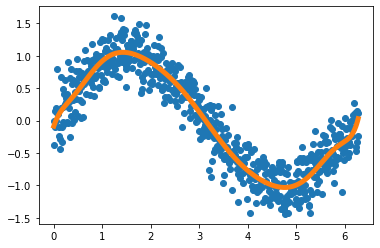

In [55]:
fit_2 = np.polyfit( x, y, 12 )
y_fit = np.zeros( len(x) )
for i in range( 13 ):
    y_fit = y_fit + fit_2[i]*x**(12-i)     

plt.clf()
plt.plot( x, y, 'o' )    
plt.plot( x, y_fit, lw=5 )

Clearly this is a better fit.

We can also fit functional forms other than polynomials. For example, suppose we knew, perhaps based on some theoretical model, that the data we are looking at should follow a sin function, but one with unknown wavelength, phase, amplitude, and offset from zero. That is, we want to fit to a functional form

\begin{equation}
y(x; \mathbf{p}) = p_0 + p_1 sin[p_2 (x - p_3)].
\end{equation}

The scipy routine curve_fit provides this capability. We use this routine in two steps. First, we must define the function we want to fit:

In [56]:
def sinfunc(x, p0, p1, p2, p3):
    return p0 + p1*np.sin(p2*(x-p3))

This function must take an argument x giving the value of the independent variable, and then some arbitrary number of additional parameters. Then we import the curve_fit function from the scipy.optimize module, and call it:

In [57]:
from scipy.optimize import curve_fit

p, pcov = curve_fit( sinfunc, x, y )

The curve_fit function returns a tuple of two values, which here we have stored to p and pcov. The first is the set of optimized parameters p. The second is what is called the [covariance matrix](http://en.wikipedia.org/wiki/Covariance_matrix), which is a 2d array the describes the variance in the parameter estimate.

In [58]:
p

array([ 2.12779163e-05,  1.02433660e+00,  9.99284812e-01, -1.15036741e-02])

We can see $\mathbf{p}$ is a very good fit to what we put in: the offset is almost zero, the amplitude is almost one, the wavelength is almost $2 \pi$ (corresponding to $p_2 = 1$), and the phase shift is almost zero. A plot of the fit looks very good too:

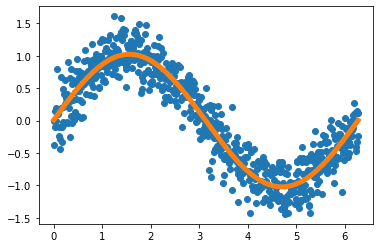

In [59]:
plt.clf()
plt.plot( x, y, 'o' )  
plt.plot(x, sinfunc(x, p[0], p[1], p[2], p[3]), lw=5)